In [17]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np

In [18]:
page = requests.get('https://www.imdb.com/list/ls091520106/')
soup =BeautifulSoup(page.content, 'html.parser')

In [19]:
duration = []
for run in soup.find_all('span', class_='runtime'):
    duration.append(run.get_text())
duration[:] = [t.replace(' min', '') for t in duration]


In [20]:
rating = []
for rate in soup.find_all('div', class_='ipl-rating-star small'):
    rate.get_text()
    rating.append(rate.get_text().replace('\n', ''))

In [26]:
movie_name = []
for name in soup.find_all('h3', class_="lister-item-header"):  # iterate over every <a> tag
    movie_name.append(name.get_text())

movie_name[:] = [s.replace('\n', '') for s in movie_name]
top_movies = []
for movie in movie_name:
    top_movies.append(''.join(c if c.isalpha() or c == ' ' else '' for c in movie))



description = []
for desc in soup.find_all('p', class_=""):
    description.append(desc.get_text())

description[:] = [t.replace('\n', '').replace('    ', '') for t in description]
description = description[1:]


In [27]:
release_dates = soup.find_all('span', class_='lister-item-year text-muted unbold')
release_list = []
for i in release_dates:
    date = i.get_text().replace('(', '').replace(')', '')
    release_list.append(date)

In [28]:
all_names = soup.find_all('p', class_='text-muted text-small')[1:]
directors_list_dirty = []
for i in all_names:
    all_directors_names = i.find('a')
    directors_list_dirty.append(all_directors_names)

directors_list = []
for i in directors_list_dirty[::3]:
    director_name = i.get_text()
    directors_list.append(director_name)

In [30]:
all_genre =[]
genre = soup.find_all("span",{"class":"genre"})
for typ in genre:
    all_genre.append(typ.get_text().strip())

all_p = soup.find_all('p',class_='text-muted text-small')
all_stars_m = []
for a in all_p:
     stars = a.get_text().strip().replace("\n",'')
     all_stars_m.append(stars)
     

all_stars =[]
for i in all_stars_m:
     if "Stars" in i:
          start = i.find('Stars:') +6
          end = len(i)
          star = i[start:end]
          all_stars.append(star)

In [31]:
movie_links = soup.find_all('h3', class_='lister-item-header')
tags_list = []
for i in movie_links: 
    href = i.findChildren('a')
    tags_list.append(href)

links1 = []
for tag in tags_list:
    for i in tag:
        links1.append(i.get('href'))

final_link_list1 = []
for i in links1:
    i = "https://www.imdb.com" + i + 'locations?ref_=tt_ql_dt_5'
    final_link_list1.append(i)

filming_dates = []
for link in final_link_list1:
    new_page = requests.get(link)
    #print(new_page)
    new_soup = BeautifulSoup(new_page.content, 'html.parser')
    try:
        tecspec_links = new_soup.find('section', {'id': 'filming_dates'}).findChildren('li')
    except:
        tecspec_links = 'No filming dates available'
    for i in tecspec_links:
        try:
            dates = i.get_text()
        except:
            dates = 'No filming dates available'
        filming_dates.append(dates.replace('\n', '').replace('                    ', '').replace('    ', ''))
filming_dates = filming_dates[:100]

In [32]:
pd.set_option('display.max_colwidth', 1)

data = {'Description': description,
        'Release Date': release_list,
        'Director Name': directors_list,
        'Rating': rating,
        'Duration': duration,
        'Genre': all_genre,
        'Stars': all_stars,
        'Filming Dates': filming_dates
}
labels = top_movies

imdb = pd.DataFrame(data, index= labels)  # Name change from DF to imdb 
imdb['Rating'] = pd.to_numeric(imdb['Rating'])
imdb['Duration'] = pd.to_numeric(imdb['Duration'])

imdb1 = imdb
imdb

,Description,Release Date,Director Name,Rating,Duration,Genre,Stars,Filming Dates
Le ali della libertà,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",1994,Frank Darabont,9.3,142,Drama,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",16 June 1993 - 10 September 1993
Il padrino,The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.,1972,Francis Ford Coppola,9.2,175,"Crime, Drama","Marlon Brando, Al Pacino, James Caan, Diane Keaton",29 March 1971 - 6 August 1971
Il padrino Parte II,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.",1974,Francis Ford Coppola,9.0,202,"Crime, Drama","Al Pacino, Robert De Niro, Robert Duvall, Diane Keaton",1 October 1973 - 19 June 1974
Il cavaliere oscuro,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",2008,Christopher Nolan,9.0,152,"Action, Crime, Drama","Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",18 April 2007 - 11 November 2007
La parola ai giurati,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,1957,Sidney Lumet,9.0,96,"Crime, Drama","Henry Fonda, Lee J. Cobb, Martin Balsam, John Fiedler",June 1956 - July 1956
...,...,...,...,...,...,...,...,...
Intrigo internazionale,A New York City advertising executive goes on the run after being mistaken for a government agent by a group of foreign spies.,1959,Alfred Hitchcock,8.3,136,"Adventure, Mystery, Thriller","Cary Grant, Eva Marie Saint, James Mason, Jessie Royce Landis",No filming dates available
Arancia meccanica,"In the future, a sadistic gang leader is imprisoned and volunteers for a conduct-aversion experiment, but it doesn't go as planned.",1971,Stanley Kubrick,8.3,136,"Crime, Drama, Sci-Fi","Malcolm McDowell, Patrick Magee, Michael Bates, Warren Clarke",No filming dates available
Snatch Lo strappo,"Unscrupulous boxing promoters, violent bookmakers, a Russian gangster, incompetent amateur robbers and supposedly Jewish jewelers fight to track down a priceless stolen diamond.",2000,Guy Ritchie,8.3,104,"Comedy, Crime","Jason Statham, Brad Pitt, Benicio Del Toro, Dennis Farina",No filming dates available
Il favoloso mondo di Amélie,"Amélie is an innocent and naive girl in Paris with her own sense of justice. She decides to help those around her and, along the way, discovers love.",2001,Jean-Pierre Jeunet,8.3,122,"Comedy, Romance","Audrey Tautou, Mathieu Kassovitz, Rufus, Lorella Cravotta",No filming dates available


In [33]:
"""Pandas Dataframe with:
normalisation max,min (rating/duration)"""

imdb['NormMaxMin(Rating/Duration)'] = ((imdb['Rating']/imdb['Duration']) - (imdb['Rating']/imdb['Duration']).min())/((imdb['Rating']/imdb['Duration']).max() - ((imdb['Rating']/imdb['Duration']).min()))
imdb


,Description,Release Date,Director Name,Rating,Duration,Genre,Stars,Filming Dates,NormMaxMin(Rating/Duration)
Le ali della libertà,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",1994,Frank Darabont,9.3,142,Drama,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",16 June 1993 - 10 September 1993,0.337462
Il padrino,The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.,1972,Francis Ford Coppola,9.2,175,"Crime, Drama","Marlon Brando, Al Pacino, James Caan, Diane Keaton",29 March 1971 - 6 August 1971,0.186117
Il padrino Parte II,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.",1974,Francis Ford Coppola,9.0,202,"Crime, Drama","Al Pacino, Robert De Niro, Robert Duvall, Diane Keaton",1 October 1973 - 19 June 1974,0.092217
Il cavaliere oscuro,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",2008,Christopher Nolan,9.0,152,"Action, Crime, Drama","Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",18 April 2007 - 11 November 2007,0.263878
La parola ai giurati,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,1957,Sidney Lumet,9.0,96,"Crime, Drama","Henry Fonda, Lee J. Cobb, Martin Balsam, John Fiedler",June 1956 - July 1956,0.668428
...,...,...,...,...,...,...,...,...,...
Intrigo internazionale,A New York City advertising executive goes on the run after being mistaken for a government agent by a group of foreign spies.,1959,Alfred Hitchcock,8.3,136,"Adventure, Mystery, Thriller","Cary Grant, Eva Marie Saint, James Mason, Jessie Royce Landis",No filming dates available,0.285182
Arancia meccanica,"In the future, a sadistic gang leader is imprisoned and volunteers for a conduct-aversion experiment, but it doesn't go as planned.",1971,Stanley Kubrick,8.3,136,"Crime, Drama, Sci-Fi","Malcolm McDowell, Patrick Magee, Michael Bates, Warren Clarke",No filming dates available,0.285182
Snatch Lo strappo,"Unscrupulous boxing promoters, violent bookmakers, a Russian gangster, incompetent amateur robbers and supposedly Jewish jewelers fight to track down a priceless stolen diamond.",2000,Guy Ritchie,8.3,104,"Comedy, Crime","Jason Statham, Brad Pitt, Benicio Del Toro, Dennis Farina",No filming dates available,0.505126
Il favoloso mondo di Amélie,"Amélie is an innocent and naive girl in Paris with her own sense of justice. She decides to help those around her and, along the way, discovers love.",2001,Jean-Pierre Jeunet,8.3,122,"Comedy, Romance","Audrey Tautou, Mathieu Kassovitz, Rufus, Lorella Cravotta",No filming dates available,0.367211


Text(0.5, 1.0, 'Directors with most Top 100 Films')

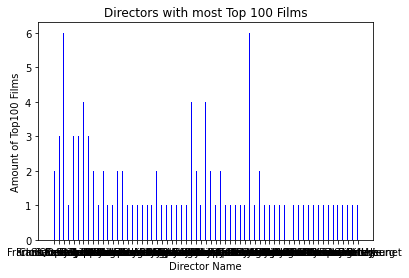

In [34]:
# visualization of No. of Movies in top 100 per director
director_top100= {}
for i in directors_list:
    director_top100[i]= directors_list.count(i)



keys = director_top100.keys()
values = director_top100.values()
df_directors = pd.DataFrame(values, index= keys)

import matplotlib.pyplot as plt
plt.bar(x = keys, height= values, width=0.2, color='blue')
plt.xlabel('Director Name')
plt.ylabel('Amount of Top100 Films')
plt.title('Directors with most Top 100 Films')

Text(0.5, 1.0, 'Stars in most Top 100 Films')

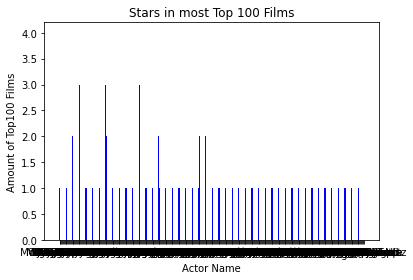

In [35]:
# visualization of No. of Movies in top 100 per Actor

all_actors = []
for i in all_stars:
    actor= i.split(',')
    for i  in actor:
        all_actors.append(i)
#print(all_actors)

actor_top100= {}
for i in all_actors:
    actor_top100[i]= all_actors.count(i)


keys = actor_top100.keys()
values = actor_top100.values()

df_actors = pd.DataFrame(values, index=keys)


plt.bar(x = keys, height= values, width=0.2, color='blue')
plt.xlabel('Actor Name')
plt.ylabel('Amount of Top100 Films')
plt.title('Stars in most Top 100 Films')

Text(0.5, 1.0, 'Film ratings by release year')

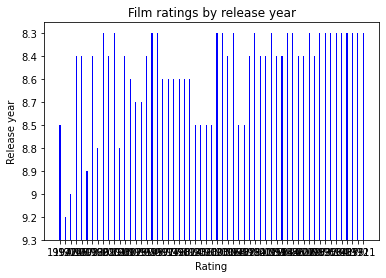

In [37]:
df_rating_releaseyear = pd.DataFrame(rating, release_list)


plt.bar(x = release_list, height= rating, width=0.2, color='blue')
plt.xlabel('Rating')
plt.ylabel('Release year')
plt.title('Film ratings by release year')